Importamos df

In [ ]:
import pandas as pd 
vino = pd.read_csv(r"C:\Users\Rana\Downloads\DatosVino2.csv", sep=";") 
vino_original=vino.copy()

In [157]:
porcentaje_nulos = vino.isnull().sum() / len(vino)
for i,k in porcentaje_nulos.items():
    if k > 0.35:
        vino= vino.drop(i, axis=1)

In [50]:
x = ["Acidez", "AcidoCitrico", "pH", "CloruroSodico", "Densidad", "Azucar", "Sulfatos", "Alcohol","PrecioBotella"]
for i in x:
    vino[i] = vino[i].str.replace(',', '.').astype(float)

In [54]:
dupli = vino.duplicated().sum()
print(dupli)

0


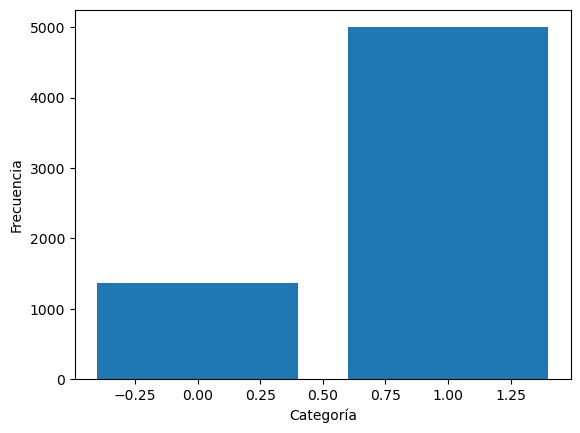

In [267]:
freq_table = vino['Compra'].value_counts()
plt.bar(freq_table.index, freq_table.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

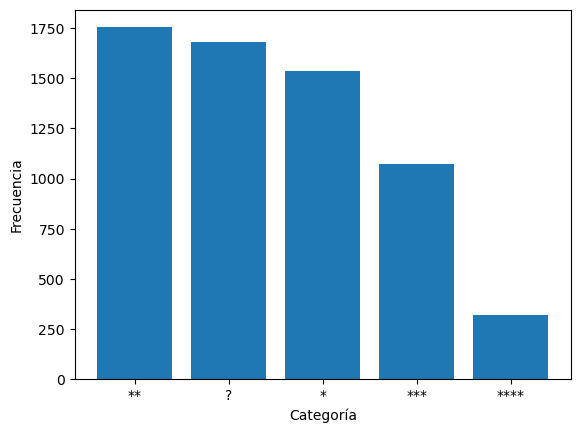

In [191]:
freq_table = vino['Clasificacion'].value_counts()
plt.bar(freq_table.index, freq_table.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

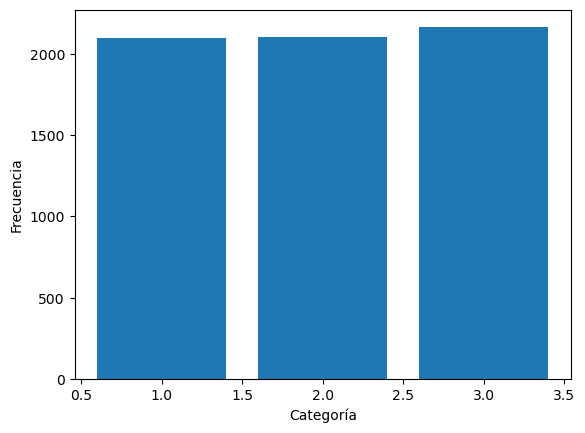

In [60]:
freq_table = vino['Region'].value_counts()
plt.bar(freq_table.index, freq_table.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
import numpy as np
null_count = vino["Region"].isnull().sum()
random_indices = np.random.choice(vino.index[vino["Region"].notnull()], size=null_count, replace=True)
vino.loc[vino["Region"].isnull(), "Region"] = vino.loc[random_indices, "Region"].values
vino["Region"] = vino["Region"].astype(str)

vino["CloruroSodico"] = vino["CloruroSodico"].replace(999, np.nan)
vino["CloruroSodico"].fillna(vino["CloruroSodico"].median(), inplace=True)
vino["CloruroSodico"] = np.abs(vino["CloruroSodico"])


vino.loc[(vino['Alcohol'] < 0) | (vino['Alcohol'] > 100), 'Alcohol'] = np.nan
vino['Alcohol'].fillna(vino['Alcohol'].median(), inplace=True)

median_sulfatos = vino["Sulfatos"].median()
vino["Sulfatos"].fillna(median_sulfatos, inplace=True)

vino["AcidoCitrico"] = np.abs(vino["AcidoCitrico"])
vino["Acidez"] = np.abs(vino["Acidez"])
vino["Sulfatos"] = np.abs(vino["Sulfatos"])

vino["Etiqueta"] = vino["Etiqueta"].str.upper()

vino = vino.drop("Beneficio", axis=1)
vino = vino.drop("ID", axis=1)

In [218]:
vino["Azucar"].describe()

count    6365.000000
mean        8.831186
std         3.165223
min         0.000000
25%         6.700000
50%         8.900000
75%        11.000000
max        17.400000
Name: Azucar, dtype: float64

In [ ]:
q1=6.700000
q3=11.000000
RI=q3-q1
per95= vino['Azucar'].quantile(0.95)
vino.loc[vino['Azucar'] >q3+1.5*RI , 'Azucar'] = per95

In [238]:
vino["Alcohol"].describe()

count    6365.000000
mean       11.894156
std         2.840814
min         0.800000
25%        10.000000
50%        11.500000
75%        13.400000
max        26.500000
Name: Alcohol, dtype: float64

In [239]:
q1=10.000000
q3=13.400000
RI=q3-q1
per95= vino['Alcohol'].quantile(0.95)
vino.loc[vino['Alcohol'] >q3+1.5*RI , 'Alcohol'] = per95

In [242]:
per05= vino['Alcohol'].quantile(0.05)
vino.loc[vino['Alcohol'] <q1-1.5*RI , 'variable'] = per05

In [276]:
vino["Clasificacion"] = vino["Clasificacion"].astype(int)

In [297]:
compra_values = vino.loc[vino_original['Clasificacion'] == '?', 'Compra']
count_0 = (compra_values == 0).sum()
count_1 = (compra_values == 1).sum()
print("cuando ?")
print("Cantidad de veces que Compra es 0:", count_0)
print("Cantidad de veces que Compra es 1:", count_1)

compra_values = vino.loc[vino_original['Clasificacion'] == '*', 'Compra']
count_0 = (compra_values == 0).sum()
count_1 = (compra_values == 1).sum()
print("cuando *")
print("Cantidad de veces que Compra es 0:", count_0)
print("Cantidad de veces que Compra es 1:", count_1)

compra_values = vino.loc[vino_original['Clasificacion'] == '**', 'Compra']
count_0 = (compra_values == 0).sum()
count_1 = (compra_values == 1).sum()
print("cuando **")
print("Cantidad de veces que Compra es 0:", count_0)
print("Cantidad de veces que Compra es 1:", count_1)

compra_values = vino.loc[vino_original['Clasificacion'] == '***', 'Compra']
count_0 = (compra_values == 0).sum()
count_1 = (compra_values == 1).sum()
print("cuando ***")
print("Cantidad de veces que Compra es 0:", count_0)
print("Cantidad de veces que Compra es 1:", count_1)

compra_values = vino.loc[vino_original['Clasificacion'] == '****', 'Compra']
count_0 = (compra_values == 0).sum()
count_1 = (compra_values == 1).sum()
print("cuando ****")
print("Cantidad de veces que Compra es 0:", count_0)
print("Cantidad de veces que Compra es 1:", count_1)

cuando ?
Cantidad de veces que Compra es 0: 1015
Cantidad de veces que Compra es 1: 665
cuando *
Cantidad de veces que Compra es 0: 306
Cantidad de veces que Compra es 1: 1229
cuando **
Cantidad de veces que Compra es 0: 46
Cantidad de veces que Compra es 1: 1708
cuando ***
Cantidad de veces que Compra es 0: 0
Cantidad de veces que Compra es 1: 1074
cuando ****
Cantidad de veces que Compra es 0: 0
Cantidad de veces que Compra es 1: 322


In [274]:
vino["Clasificacion"] = vino["Clasificacion"].replace({"?": 1, "*": 2, "**": 3, "***": 4, "****": 5})


In [253]:
import pandas as pd
import scipy.stats as stats
crosstab_result = pd.crosstab(index=vino["Clasificacion"], columns=vino["Compra"])
chi2_stat, p_value, _, _ = stats.chi2_contingency(crosstab_result)
if p_value < 0.05:
    print("La variable está asociada de forma significativa con el  target.")
else:
    print("No se encontró una asociación significativa entre la variable y el target.")

La variable está asociada de forma significativa con el  target.


In [201]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

X = vino[['Acidez', 'AcidoCitrico', 'pH', 'CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos', 'Alcohol', 'CalifProductor', 'PrecioBotella']]
y = vino['Compra']

model = ExtraTreesClassifier()
model.fit(X, y)

importance_table = pd.DataFrame({'Variable': X.columns, 'Importancia': model.feature_importances_})
print(importance_table)


         Variable  Importancia
0          Acidez     0.070275
1    AcidoCitrico     0.072488
2              pH     0.237082
3   CloruroSodico     0.069503
4        Densidad     0.068695
5          Azucar     0.168848
6        Sulfatos     0.068118
7         Alcohol     0.073212
8  CalifProductor     0.104011
9   PrecioBotella     0.067767


In [ ]:
vino.drop(['CloruroSodico', 'Densidad', 'Sulfatos', 'PrecioBotella', 'Acidez'], axis=1, inplace=True)

In [254]:
vino.drop(['Region', 'Etiqueta'], axis=1, inplace=True)

In [200]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = vino[['Acidez', 'AcidoCitrico', 'pH', 'CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos', 'Alcohol', 'CalifProductor', 'PrecioBotella']]
y = vino['Compra']
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


         variables          VIF
0            const  1482.413832
1           Acidez     1.001986
2     AcidoCitrico     1.003807
3               pH     1.007134
4    CloruroSodico     1.001397
5         Densidad     1.002288
6           Azucar     1.245966
7         Sulfatos     1.001834
8          Alcohol     1.226234
9   CalifProductor     1.022238
10   PrecioBotella     1.000800


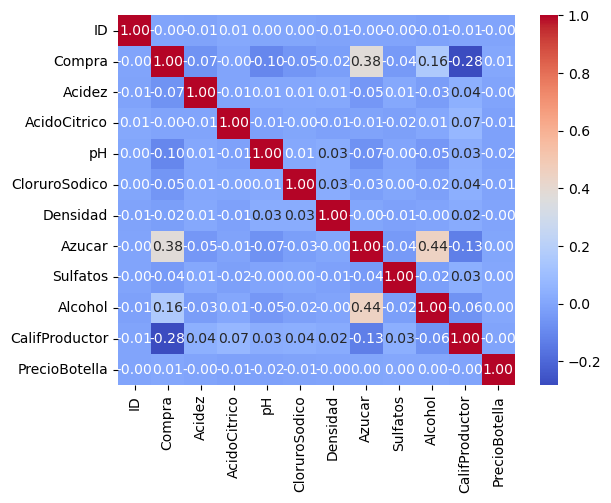

<Figure size 1000x800 with 0 Axes>

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = vino.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 8))
plt.show()

In [282]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
X = vino.drop('Compra', axis=1)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
df_std = pd.DataFrame(rescaledX, columns=X.columns)
df_std["Compra"]=vino["Compra"]
df_std

,pH,Azucar,Alcohol,CalifProductor,Clasificacion,Compra
0,-2.269476,-0.926133,-1.980333,1.721255,-1.259989,0
1,-1.777809,-0.768154,-0.120538,0.953344,-1.259989,0
2,-2.171143,-0.546983,-0.613953,-0.582478,-1.259989,0
3,-2.054930,-1.684433,-2.815343,0.953344,-1.259989,0
4,-1.590082,-0.515387,-0.651908,-0.582478,-1.259989,0
...,...,...,...,...,...,...
6360,0.912949,0.211317,0.334922,-0.582478,-0.420480,0
6361,1.279464,0.021742,-0.575998,-0.582478,-1.259989,0
6362,1.207949,-1.273687,-1.600783,0.185433,-1.259989,0
6363,0.591131,1.506746,0.752427,-0.582478,-0.420480,0


In [294]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = vino.drop(['Compra'], axis=1)
y = vino['Compra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
result = model.score(X_test,y_test)
print(result)


0.8641005498821681


desiciones arbitrarias: 
tomar valor absoluto de negativos. (parecian logicos)
eliminar todas cualitativas segun chi cuadrado.

desiciones buenas: 
pasar a nulo los 999 antes de calcular mediana. 
pasar a nulo los fuera de rango indicado antes de caluclar mediana.
elegir solo 5 variables numericas.

desiciones polemicas: 
tratamiento de variable clasificacion. Era la mas importante (codigo 100% rudimentario)  

pregunta: Siempre hay que reasignar los outliers? o solo cuando creemos que son mentira ?